In [10]:
import statsmodels.stats.power as smp
import statsmodels.stats.api as sms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np
%matplotlib inline

In [2]:
num_subs = [25, 50, 100, 200]
corr = np.arange(0.01,1,.01)

df = {'Sample Size':[], 'power':[], 'unit':[], 'corr':[], 'condition':[]}
df_corrected = {'Sample Size':[], 'power':[], 'unit':[], 'corr':[], 'condition':[]}

for nsubs in num_subs:
    
    power = [smp.NormalIndPower().power(np.arctanh(r), nobs1=nsubs-3, alpha=0.05, ratio=0, alternative='two-sided')
             for r in corr]

    corr_corrected = corr*.79
    power_corrected = [smp.NormalIndPower().power(np.arctanh(r), nobs1=nsubs-3, alpha=0.05, ratio=0, alternative='two-sided')
             for r in corr_corrected]
    
    
    df['Sample Size'].extend([nsubs]*len(power))
    df['power'].extend(power)
    df['corr'].extend(corr)
    df['condition'].extend(['standard']*len(power))
    df['unit'].extend([1]*len(power))
    
    df_corrected['Sample Size'].extend([nsubs]*len(power))
    df_corrected['power'].extend(power_corrected)
    df_corrected['corr'].extend(corr)
    df_corrected['condition'].extend(['standard']*len(power))
    df_corrected['unit'].extend([1]*len(power))
    

df = pd.DataFrame(df)
df_corrected = pd.DataFrame(df_corrected)

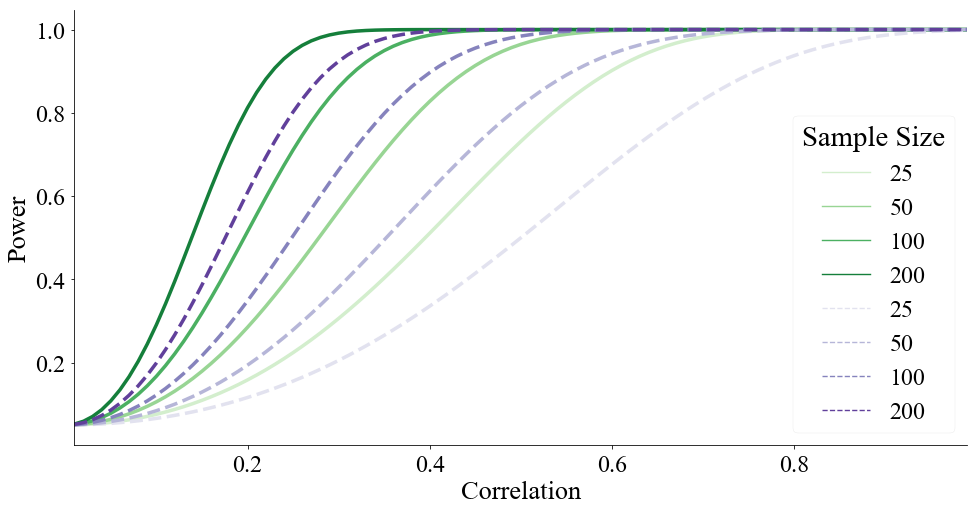

In [8]:
sns.set_context('paper',font_scale = 3,rc={"figure.figsize": (10, 10)})
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
fig = plt.figure(figsize = (16,8))

ax = sns.tsplot(time = 'corr', value = 'power', unit = 'unit', condition = 'Sample Size', data = df,
          color = 'Greens')

ax = sns.tsplot(time = 'corr', value = 'power', unit = 'unit', condition = 'Sample Size', data = df_corrected,
          color = 'Purples', linestyle = '--')

lw = ax.lines[0].get_linewidth()*2.5 # lw of first line
plt.setp(ax.lines,linewidth=lw)


sns.despine()
plt.xlabel('Correlation')
plt.ylabel('Power')
plt.savefig('Power.svg', dpi = 300)

In [9]:
corr = .3
reduction = .9

[smp.NormalIndPower().solve_power(np.arctanh(r), alpha=0.05, ratio=0,
            power= 0.8, alternative='two-sided') + 3 for r in [corr, corr*reduction]]

[84.92761044616469, 105.39392460172748]